### Simple Linear Regression

##### Importing necessary packages

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import seaborn as sns
%matplotlib inline

##### Reading the data

In [7]:
salary_data = pd.read_csv("Salary_Data.csv")

In [8]:
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


##### Scatter Plot

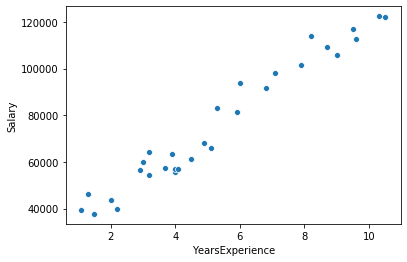

In [9]:
sns.scatterplot(x = salary_data.YearsExperience, y = salary_data.Salary)

From the above scatter plot, we can say that there is a clear "Linear Relationship" (highly correlated) between the "Years of Experience" of the employee and their "Salary".

##### Separating the independant variables and the dependant variable

In [10]:
X = salary_data.iloc[:,:-1].values   # independant variables/predictors/estimators
y = salary_data.iloc[:,-1].values    # dependant/target variable

In [11]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [12]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

##### Splitting the data into train and test set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
print("X_train:");print(X_train)
print("\n\nX_test:");print(X_test)
print("\n\ny_train:");print(y_train)
print("\n\ny_test:");print(y_test)

X_train:
[[10.3]
 [ 8.7]
 [ 4. ]
 [ 1.1]
 [ 2.2]
 [ 5.1]
 [ 2.9]
 [ 4.1]
 [ 4. ]
 [ 7.9]
 [ 1.3]
 [ 1.5]
 [ 9. ]
 [ 2. ]
 [ 7.1]
 [ 9.5]
 [ 5.9]
 [10.5]
 [ 6.8]
 [ 3.2]
 [ 3.9]
 [ 4.5]
 [ 6. ]
 [ 3. ]]


X_test:
[[9.6]
 [4.9]
 [8.2]
 [5.3]
 [3.2]
 [3.7]]


y_train:
[122391. 109431.  56957.  39343.  39891.  66029.  56642.  57081.  55794.
 101302.  46205.  37731. 105582.  43525.  98273. 116969.  81363. 121872.
  91738.  54445.  63218.  61111.  93940.  60150.]


y_test:
[112635.  67938. 113812.  83088.  64445.  57189.]


##### Modeling our Regressor

In [14]:
simple_regressor = LinearRegression()
simple_regressor.fit(X_train, y_train)   # training our linear model over the training sets

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Predicting values

In [15]:
y_pred = simple_regressor.predict(X_test)
y_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

##### Creating dataframe to compare Actual and Predicted target values

In [16]:
pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

,Actual,Predicted
0,112635.0,115790.210113
1,67938.0,71498.278095
2,113812.0,102596.868661
3,83088.0,75267.804224
4,64445.0,55477.792045
5,57189.0,60189.699707


##### Printing out the Co-efficient `(b)` and the Intercept `(c)` of our fitted regressor line `(bx+c)`

In [17]:
print("Intercept: ", simple_regressor.intercept_, "\tCo-efficient: ", simple_regressor.coef_)

Intercept:  25321.583011776813 	Co-efficient:  [9423.81532303]


##### Plotting the test data and the fitted regression line

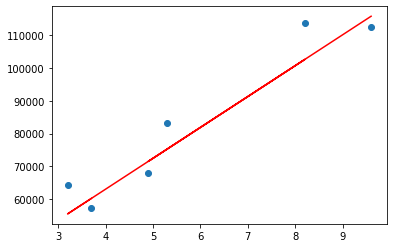

In [19]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = 'Red')

##### Checking the performance of the model

In [20]:
N = len(X)
p = len(salary_data.columns) - 1
r2 = metrics.r2_score(y_test, y_pred)

In [21]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred))
print("Adjusted R2 Score: ", 1-(((1-r2)*(N-1))/(N-p-1)))

RMSE:  7059.04362190151
R2 Score:  0.9024461774180497
Adjusted R2 Score:  0.8989621123258371


### Multiple Linear Regression

##### Importing necessary packages

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import seaborn as sns
%matplotlib inline

##### Reading the dataset

In [24]:
startup_data = pd.read_csv("50_Startups.csv")

In [25]:
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


##### Checking the correlation between the features

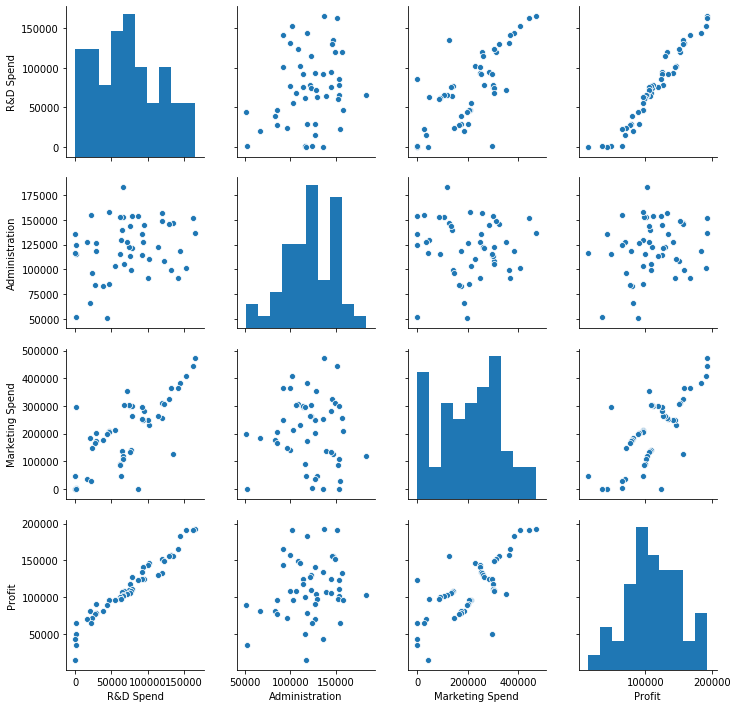

In [26]:
sns.pairplot(startup_data)

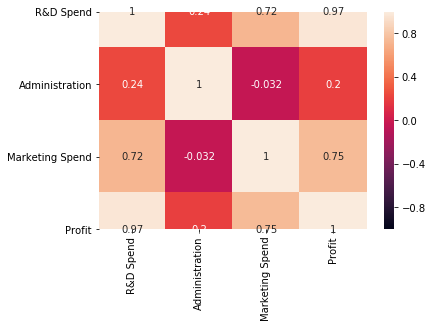

In [27]:
sns.heatmap(startup_data.corr(), annot = True, vmin = -1)

##### Separating the independant variables and the dependant variables

In [28]:
X = startup_data.iloc[:,:-1].values    # independant variables/predictors/estimators
y = startup_data.iloc[:,-1].values     # dependant/target variable

In [29]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [30]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

##### Before proceeding with the regression process we must encode our categorical data

In [31]:
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [32]:
X

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

##### Doing OneHotEncoding could lead to a dummy variable trap, we must handle it

In [33]:
X = X[:,1:]
X

array([[0.0000000e+00, 1.0000000e+00, 1.6534920e+05, 1.3689780e+05,
        4.7178410e+05],
       [0.0000000e+00, 0.0000000e+00, 1.6259770e+05, 1.5137759e+05,
        4.4389853e+05],
       [1.0000000e+00, 0.0000000e+00, 1.5344151e+05, 1.0114555e+05,
        4.0793454e+05],
       [0.0000000e+00, 1.0000000e+00, 1.4437241e+05, 1.1867185e+05,
        3.8319962e+05],
       [1.0000000e+00, 0.0000000e+00, 1.4210734e+05, 9.1391770e+04,
        3.6616842e+05],
       [0.0000000e+00, 1.0000000e+00, 1.3187690e+05, 9.9814710e+04,
        3.6286136e+05],
       [0.0000000e+00, 0.0000000e+00, 1.3461546e+05, 1.4719887e+05,
        1.2771682e+05],
       [1.0000000e+00, 0.0000000e+00, 1.3029813e+05, 1.4553006e+05,
        3.2387668e+05],
       [0.0000000e+00, 1.0000000e+00, 1.2054252e+05, 1.4871895e+05,
        3.1161329e+05],
       [0.0000000e+00, 0.0000000e+00, 1.2333488e+05, 1.0867917e+05,
        3.0498162e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0191308e+05, 1.1059411e+05,
        2.29

##### Splitting the data into train and test sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
print("X_train:");print(X_train)
print("\n\nX_test:");print(X_test)
print("\n\ny_train:");print(y_train)
print("\n\ny_test:");print(y_test)

X_train:
[[1.0000000e+00 0.0000000e+00 9.3863750e+04 1.2732038e+05 2.4983944e+05]
 [1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04 3.6616842e+05]
 [0.0000000e+00 0.0000000e+00 4.4069950e+04 5.1283140e+04 1.9702942e+05]
 [0.0000000e+00 1.0000000e+00 1.2054252e+05 1.4871895e+05 3.1161329e+05]
 [0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05 3.8319962e+05]
 [0.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05 1.2771682e+05]
 [1.0000000e+00 0.0000000e+00 2.7892920e+04 8.4710770e+04 1.6447071e+05]
 [1.0000000e+00 0.0000000e+00 1.3154600e+03 1.1581621e+05 2.9711446e+05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.3542692e+05 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.1452361e+05 1.2261684e+05 2.6177623e+05]
 [0.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05 3.0498162e+05]
 [0.0000000e+00 0.0000000e+00 7.8013110e+04 1.2159755e+05 2.6434606e+05]
 [0.0000000e+00 1.0000000e+00 7.7044010e+04 9.9281340e+04 1.4057481e+05]
 [0.0000000e+00 0.0000000e+00 4.6426070e+0

##### Modeling our regressor

In [36]:
multiple_regressor = LinearRegression()
multiple_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Predicting target values

In [37]:
y_pred = multiple_regressor.predict(X_test)
y_pred

array([126362.87908252,  84608.45383643,  99677.49425155,  46357.46068582,
       128750.48288497,  50912.41741905, 109741.350327  , 100643.24281644,
        97599.275746  , 113097.42524437])

##### Creating dataframe to compare Actual and Predicted target values

In [38]:
pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

,Actual,Predicted
0,134307.35,126362.879083
1,81005.76,84608.453836
2,99937.59,99677.494252
3,64926.08,46357.460686
4,125370.37,128750.482885
5,35673.41,50912.417419
6,105733.54,109741.350327
7,107404.34,100643.242816
8,97427.84,97599.275746
9,122776.86,113097.425244


##### Printing out the Co-efficients `(b1,b2,b3,b4,b5)` and the Intercept `(c)` of our fitted regressor line `(b1x1 + b2x2 + b3x3 + b4x4 + b5x5 + c)`

In [39]:
print("Intercept: ", multiple_regressor.intercept_, "\tCo-efficient: ", multiple_regressor.coef_)

Intercept:  54028.039594058864 	Co-efficient:  [ 9.38793006e+02  6.98775997e+00  8.05630064e-01 -6.87878823e-02
  2.98554429e-02]


##### Checking the performance of the model

In [40]:
N = len(X)
p = len(startup_data.columns)-1
r2 = metrics.r2_score(y_test, y_pred)

In [41]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred))
print("Adjusted R2 Score: ", 1-(((1-r2)*(N-1))/(N-p-1)))

RMSE:  9055.957323497796
R2 Score:  0.8987266414319841
Adjusted R2 Score:  0.8897245651148271


### Reference Material

Linear Regression Explained: https://www.youtube.com/watch?v=nk2CQITm_eo <br>
R-squared and Adjusted R-squared: https://www.listendata.com/2014/08/adjusted-r-squared.html <br>
ANOVA Test: https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/anova/ <br>
Chi-Square Test: https://www.analyticsvidhya.com/blog/2019/11/what-is-chi-square-test-how-it-works/ <br>
Understanding Error Metrics for Regression: https://www.dataquest.io/blog/understanding-regression-error-metrics/